### Citation Analysis of the ACL Corpus

In [117]:
# create the citation networks
import pandas as pd

In [118]:
acl_articles = pd.read_parquet("acl-publication-info.74k.v2.parquet")

In [119]:
acl_articles['journal']

0        None
1        None
2        None
3        None
4        None
         ... 
73280    None
73281    None
73282    None
73283    None
73284    None
Name: journal, Length: 73285, dtype: object

In [120]:
# sort the articles in chronological order
acl_articles.sort_values(by=['year'],inplace=True)

In [121]:
# replace the full journal name by abbrevation
def apply_abbreviation(row):
    if row == 'Computational Linguistics':
        return 'CL'
    elif row == "American Journal of Computational Linguistics":
        return "AJCL"
    elif row == "Transactions of the Association for Computational Linguistics":
        return 'TACL'
    
    return "Conference"
acl_articles['journal'] = acl_articles['journal'].apply(apply_abbreviation)

In [122]:
acl_articles['journal'].value_counts()

journal
Conference    71248
CL             1376
TACL            333
AJCL            328
Name: count, dtype: int64

### How does the number of citations change across time for each of the three journals?

In [123]:
# 
acl_articles['journal'].value_counts()

journal
Conference    71248
CL             1376
TACL            333
AJCL            328
Name: count, dtype: int64

In [124]:
# get the non_journal papers
non_journal_articles = acl_articles.loc[(acl_articles['journal'] != 'Computational Linguistics') & (acl_articles['journal'] != 'American Journal of Computatational Linguistics')
                                        & (acl_articles['journal'] != 'Transactions of the Association for Computational Linguistics')]
non_journal_articles.shape

# there are 71576 non-journal articles

(73285, 25)

In [125]:
english_papers = acl_articles.loc[acl_articles['language'] == 'English']

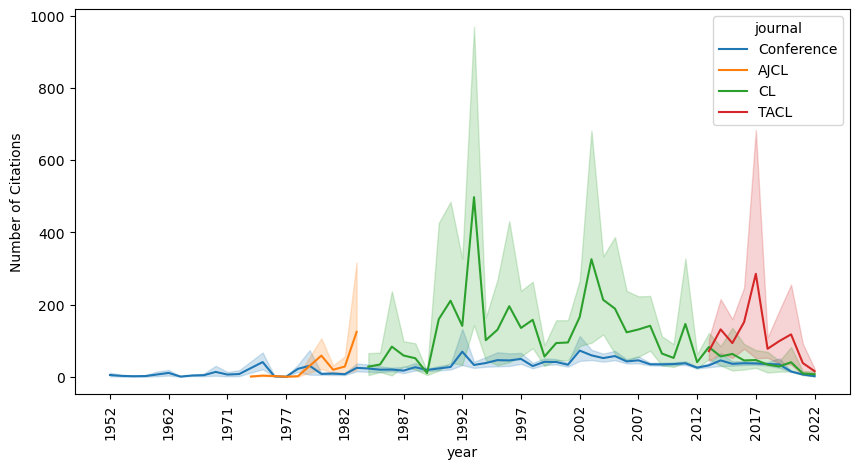

In [126]:
# visualize the number of citations across time over the three journals for all papers
import seaborn as sns
import matplotlib.pyplot as plt

import matplotlib.ticker as ticker

plt.figure(figsize=(10,5))
ax = sns.lineplot(x="year",y="numcitedby", hue="journal", data=acl_articles, sort=False)
ax.xaxis.set_major_locator(ticker.MultipleLocator(base=5))
plt.xticks(rotation="vertical")
plt.ylabel("Number of Citations")
plt.savefig("citations_over_time_journal.png")

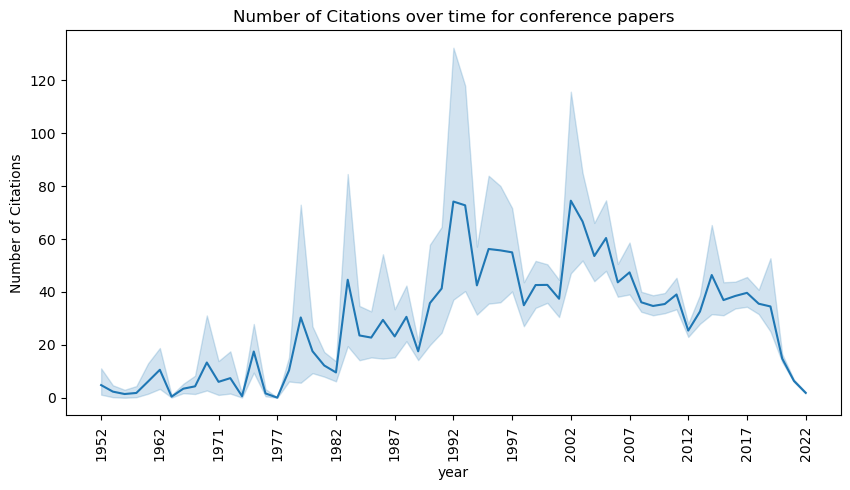

In [127]:
plt.figure(figsize=(10,5))
ax = sns.lineplot(x="year",y="numcitedby", data=non_journal_articles, sort=False)
ax.xaxis.set_major_locator(ticker.MultipleLocator(base=5))
plt.xticks(rotation="vertical")
plt.ylabel("Number of Citations")
plt.title("Number of Citations over time for conference papers")
plt.savefig("citations_over_time_conference.png", bbox_inches="tight")

#### Average number of citations for each paper across each journals and conference

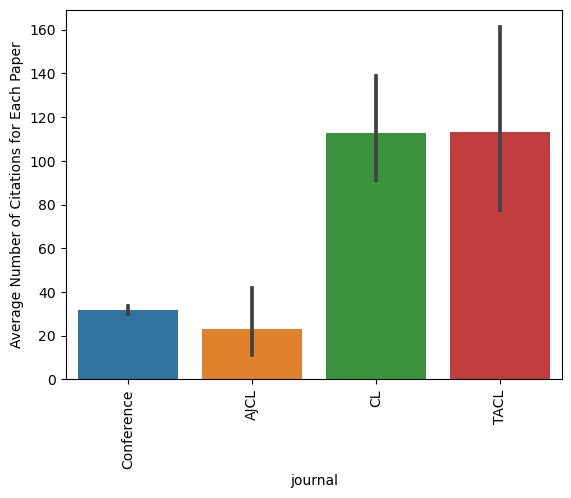

In [128]:
sns.barplot(x="journal",y="numcitedby",data=acl_articles)
plt.xticks(rotation="vertical")
plt.ylabel("Average Number of Citations for Each Paper")
plt.savefig('average_citations_journals_conference.png',bbox_inches="tight")


In [136]:
# summary statistics
# First we are interested in the average number of citations of papers for each of the journals
# get the average number of citations for the American Journal of Computational Linguistics
american_journal_comp_ling = acl_articles.loc[acl_articles['journal'] == 'AJCL']
num_papers_american_journal_comp_ling = american_journal_comp_ling.shape[0]
mean_citation = round(american_journal_comp_ling['numcitedby'].mean(),2)
print(f"For the American Journal of Computational Linguistics, there are {num_papers_american_journal_comp_ling} papers with average {mean_citation} citations")

# the average number of citations for a paper in Computational Linguistics
comp_ling = acl_articles.loc[acl_articles['journal'] == 'CL']
num_papers_comp_ling = comp_ling.shape[0]
mean_citation = round(comp_ling['numcitedby'].mean(),2)
print(f"For the Computational Linguistics, there are {num_papers_comp_ling} papers with average {mean_citation} citations")

# the average number of citations for a paper in Transactions of the Association for Computational Linguistics
trans_acl = acl_articles.loc[acl_articles['journal'] == 'TACL']
num_papers_trans_acl = trans_acl.shape[0]
mean_citation = round(trans_acl['numcitedby'].mean(),2)
print(f"For the Transactions of the Association for Computational Linguistics, there are {num_papers_trans_acl} papers with average {mean_citation} citations")

# average number of citations for a paper in the conference proceedings
num_papers_nonjournal = non_journal_articles.shape[0]
mean_citation = round(non_journal_articles['numcitedby'].mean(),2)
print(f"For the conference papers, there are {num_papers_nonjournal} papers with average {mean_citation} citations")



For the American Journal of Computational Linguistics, there are 328 papers with average 22.96 citations
For the Computational Linguistics, there are 1376 papers with average 112.77 citations
For the Transactions of the Association for Computational Linguistics, there are 333 papers with average 113.14 citations
For the conference papers, there are 73285 papers with average 33.36 citations


#### Average Number of Times each paper is cited across different languages

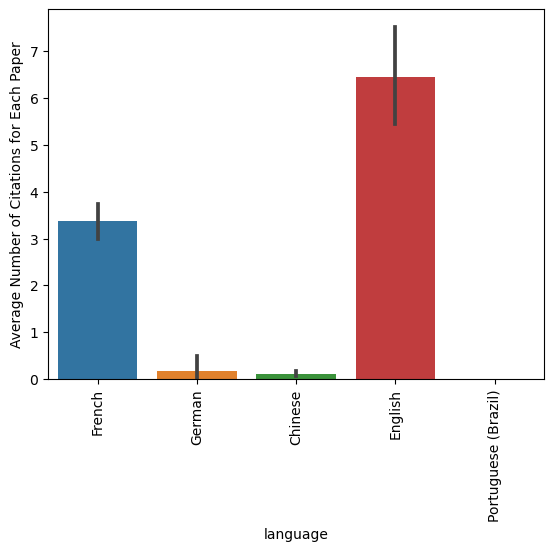

In [137]:
sns.barplot(x="language",y="numcitedby",data=acl_articles)
plt.xticks(rotation="vertical")
plt.ylabel("Average Number of Citations for Each Paper")
plt.savefig('average_citations_language.png',bbox_inches="tight")

In [138]:
# number of papers for each language
# english
english_papers = acl_articles.loc[acl_articles['language'] == 'English']
num_english_papers = english_papers.shape[0]
mean_citation_english_paper = round(english_papers['numcitedby'].mean(),2)
print(f"For the English papers, there are {num_english_papers} with average of {mean_citation_english_paper} citations")

# french
french_papers = acl_articles.loc[acl_articles['language'] == 'French']
num_french_papers = french_papers.shape[0]
mean_citation_french_paper = round(french_papers['numcitedby'].mean(),2)
print(f"For the French papers, there are {num_french_papers} papers with average of {mean_citation_french_paper} citations")

# chinese
chinese_papers = acl_articles.loc[acl_articles['language'] == 'Chinese']
num_chinese_papers = chinese_papers.shape[0]
mean_citation_chinese_paper = round(chinese_papers['numcitedby'].mean(),2)
print(f"For the Chinese papers, there are {num_chinese_papers} papers with average of {mean_citation_chinese_paper} citations")

# german
german_papers = acl_articles.loc[acl_articles['language'] == 'German']
num_german_papers = german_papers.shape[0]
mean_citation_german_paper = round(german_papers['numcitedby'].mean(),2)
print(f"For the German papers, there are {num_german_papers} papers with average of {mean_citation_german_paper} citations")

# portuguese
portuguese_papers = acl_articles.loc[acl_articles['language'] == 'Portuguese (Brazil)']
num_portuguese_papers = portuguese_papers.shape[0]
mean_citation_portuguese_paper = round(portuguese_papers['numcitedby'].mean(),2)
print(f"For the Portuguese papers, there are {num_portuguese_papers} papers with average of {mean_citation_portuguese_paper} citations")

For the English papers, there are 1371 with average of 6.46 citations
For the French papers, there are 1453 papers with average of 3.37 citations
For the Chinese papers, there are 188 papers with average of 0.12 citations
For the German papers, there are 6 papers with average of 0.17 citations
For the Portuguese papers, there are 2 papers with average of 0.0 citations


## Hypothesis Testing: Independent t-Test

In [141]:
from scipy.stats import ttest_ind
 
# number of citations for the AJCL
num_citations_ajcl = american_journal_comp_ling['numcitedby'].to_numpy()

# number of citations for the CL
num_citations_cl = comp_ling['numcitedby'].to_numpy()

 
# Conduct the independent T test with alternative hypothesis that numcitedby (AJCL) < numcitedby (CL)
ttest_ind(num_citations_ajcl, num_citations_cl,alternative='less')

# p value is 9.774e-5, so we accept the alternative hypothesis and reject the null



TtestResult(statistic=-3.7329175849852136, pvalue=9.774904039237182e-05, df=1702.0)

In [144]:
# number of citations for the TACL
num_citations_tacl = trans_acl['numcitedby'].to_numpy()

# number of citations for the CL
num_citations_cl = comp_ling['numcitedby'].to_numpy()

# Conduct the independent T test that numcitedby (AJCL) = numcitedby (CL)
ttest_ind(num_citations_tacl, num_citations_cl)

# p value is 0.988 so we fail to reject H0 that the number of citations for TACL is equal to number of citations for CL

TtestResult(statistic=0.014263285636436189, pvalue=0.9886215972491046, df=1707.0)

#### Hypothesis Test for English Cited Most Often Claim

In [148]:
num_citations_english_papers = english_papers['numcitedby'].to_numpy()
num_citations_portuguese_papers = portuguese_papers['numcitedby'].to_numpy()
num_citations_chinese_papers = chinese_papers['numcitedby'].to_numpy()
num_citations_french_papers = french_papers['numcitedby'].to_numpy()
num_citations_german_papers = german_papers['numcitedby'].to_numpy()

In [162]:
pvalue_english_german = ttest_ind(num_citations_english_papers, num_citations_german_papers, alternative='greater').pvalue
pvalue_english_portuguese = ttest_ind(num_citations_english_papers, num_citations_portuguese_papers, alternative='greater').pvalue
pvalue_english_chinese = ttest_ind(num_citations_english_papers, num_citations_chinese_papers, alternative='greater').pvalue
pvalue_english_french = ttest_ind(num_citations_english_papers, num_citations_french_papers, alternative='greater').pvalue

print(f"For the English-Portuguese hypothesis test, the p value is {pvalue_english_portuguese}")
print(f"For the English-Chinese hypothesis test, the p value is {pvalue_english_chinese}")
print(f"For the English-German hypothesis test, the p value is {pvalue_english_german}")
print(f"For the English-French hypothesis test, the p value is {pvalue_english_french}")


For the English-Portuguese hypothesis test, the p value is 0.3216412447412919
For the English-Chinese hypothesis test, the p value is 5.523637598902836e-06
For the English-German hypothesis test, the p value is 0.2172870319157218
For the English-French hypothesis test, the p value is 1.1546747349599858e-08
